In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("/workspaces/Data-Portfolio-Projects/uk_post_compulsory_education_fe_students.csv")
df

,time_period,time_identifier,geographic_level,country_code,country_name,gender,age,mode_of_study,t_students
0,202122,Academic year,National,N92000002,Northern Ireland,Female,<16,Full-time,low
1,202122,Academic year,National,N92000002,Northern Ireland,Female,<16,Part-time,955
2,202122,Academic year,National,N92000002,Northern Ireland,Female,16,Full-time,1700
3,202122,Academic year,National,N92000002,Northern Ireland,Female,16,Part-time,720
4,202122,Academic year,National,N92000002,Northern Ireland,Female,17,Full-time,1610
...,...,...,...,...,...,...,...,...,...
949,202122,Academic year,National,E92000001,England,Total,28,Work-based learning,x
950,202122,Academic year,National,E92000001,England,Total,29,Work-based learning,x
951,202122,Academic year,National,E92000001,England,Total,30+,Work-based learning,x
952,202122,Academic year,National,E92000001,England,Total,Total,Work-based learning,x


In [9]:
df['country_name'].unique()

array(['Northern Ireland', 'Scotland', 'Wales', 'England',
       'United Kingdom'], dtype=object)

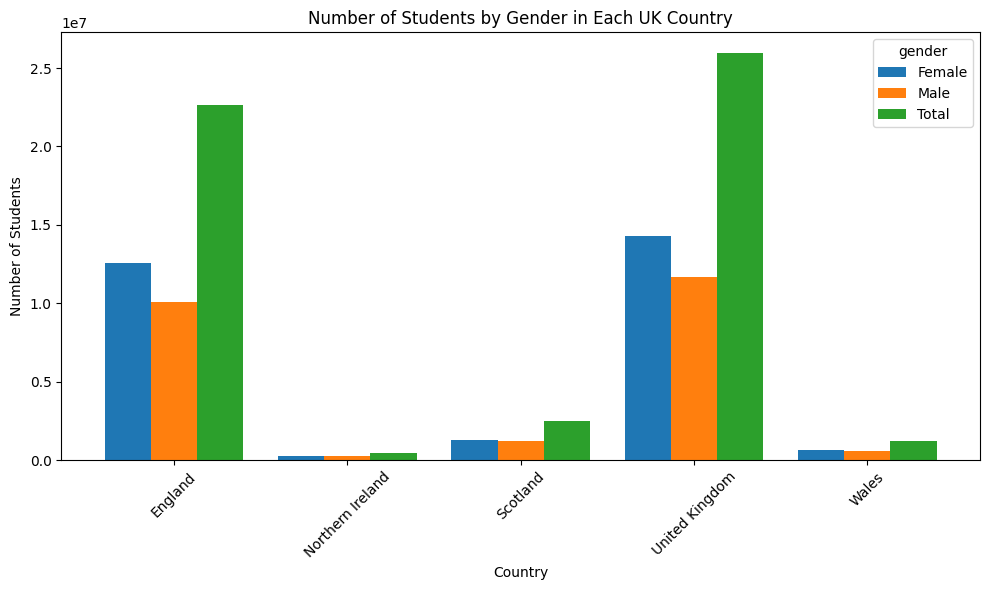

In [27]:
# Convert 'low' and 'x' to numeric values or exclude them
df['t_students'] = pd.to_numeric(df['t_students'], errors='coerce')

# Drop rows with NaN values in 't_students' column
df = df.dropna(subset=['t_students'])

# Aggregate data by country and gender
df_grouped = df.groupby(['country_name', 'gender'])['t_students'].sum().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped.plot(kind='bar', ax=ax, width=0.8)

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Number of Students')
ax.set_title('Number of Students by Gender in Each UK Country')

# Rotate x-ticks for readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [40]:
#import seaborn as sns
# Drop rows where 'age' is 'Total' or 'Unknown'
df1 = df[~df['age'].isin(['Total', 'Unknown','30+'])]
df2 = df1[~df1['gender'].isin(['Total'])]

/tmp/ipykernel_11655/1118506893.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df2,y='t_students',x='age', hue= 'gender', ci= None)


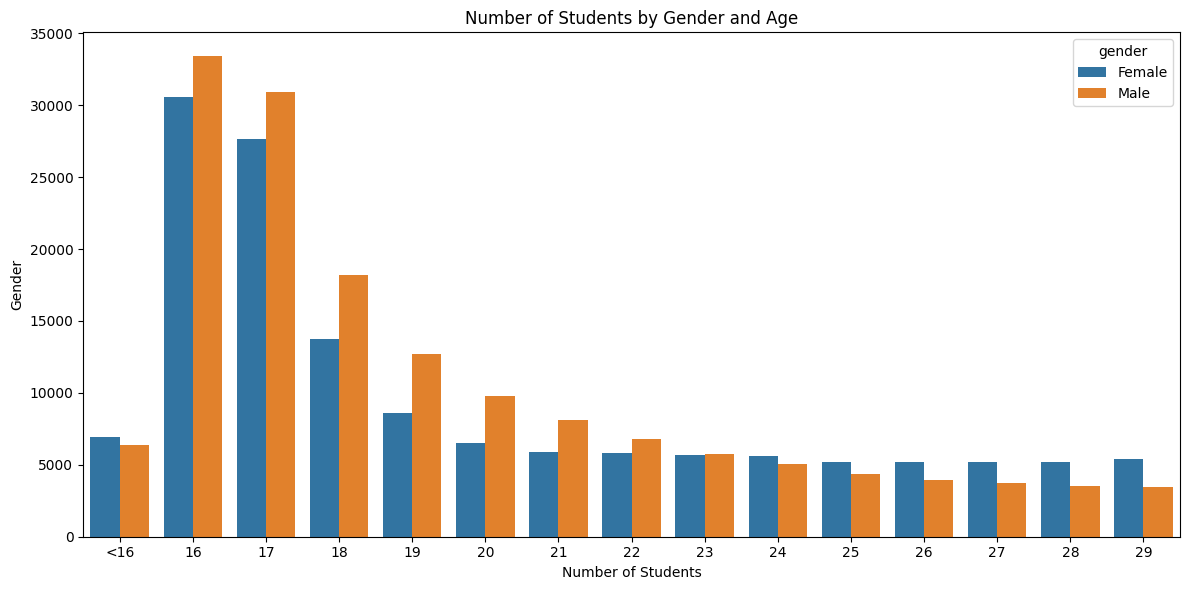

In [43]:
# Increase plot size using plt.figure
plt.figure(figsize=(12, 6))

sns.barplot(data=df2,y='t_students',x='age', hue= 'gender', ci= None)


# Set labels and title
plt.xlabel('Number of Students')
plt.ylabel('Gender')
plt.title('Number of Students by Gender and Age')

# Show plot
plt.tight_layout()
plt.show()